# Affective Computing - Overview over data sample

This short jupyter-File gives an overview of our data handling and the steps which will be implemented on more data.
At the moment there is only < 10 Minutes of Data tracking available, so Results are not representative.

In [61]:
import helper.visuals as vs
from firebase.firebase_wrapper import *
from helper.preprocessor import *
import pandas as pd
from IPython.display import display

# Pretty display for notebooks
#%matplotlib inline

wrapper and preprocessor are objects for getting the data out of firebase and reformat them over a sliding window (size=10, step-size=1). Tracking on iOS-Device was made every 500ms 

In [3]:
wrapper = Wrapper()
preprocessor = Preprocessor()
wrapper.auth_and_login()

creating a pandas-dataframe with column-headers out of data. There are 11 features and the recommended_action/classified playlist.

In [11]:
#recommended_action = 0
#node1 = wrapper.db.child("song_data_history").child("20171130182405_punky_2002").get()
#node2 = wrapper.db.child("song_data").child("punky_2002").get()
#node4 = wrapper.db.child("song_data").child("11127020586").get()
#recommended_action = 1
#node3 = wrapper.db.child("song_data_history").child("20171130182659_punky_2002").get()
#node3 = wrapper.db.child("song_data_history").child("20171206144837_11127020586").get()



data_list = []

all_entries = wrapper.db.child("song_data_history").get()
for entry in all_entries.each():
    entry_key = entry.key()
    if "11127020586" in entry_key:
        data_list.append(entry)
    

for data in data_list:

    timestamps, gsr_resistance, heart_beat_rate, rr_rate, motiontype, \
    skin_temp, recommended_action = wrapper.get_data_from_pyrebase_object(data)

    preprocessor.calculate_feature_vector_list(timestamps, gsr_resistance, heart_beat_rate, \
                                            rr_rate, motiontype, skin_temp, recommended_action)
    
feature_matrix = pd.DataFrame(preprocessor.feature_vector_list)
feature_matrix.columns = ["M(GSR_Res)", "Std(GSR_Res)", "M(HBR)", "Std(HBR)", "M(RR)", "Std(RR)", \
                                   "RMSSD(RR)", "M(Motion)", "Std(Motion)", "M(ST)", "Std(ST)", "Classified"]

summary of data was visualized as table just to figure out if all values are in normal range. Heart_Beat_Rate varies from 58 to 77,5 BPM, Skin_temperature is in between 29.5 to 31.82 celsius.

In [12]:
display(feature_matrix.describe())

,M(GSR_Res),Std(GSR_Res),M(HBR),Std(HBR),M(RR),Std(RR),RMSSD(RR),M(Motion),Std(Motion),M(ST),Std(ST),Classified
count,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6.290000e+03,6290.000000
mean,1179.599046,26.345832,81.435898,1.545841,0.719318,0.083308,0.102464,1.027202,0.009474,31.771866,2.005877e-02,0.646582
std,117.595552,53.861403,6.862534,2.261840,0.081651,0.070850,0.091945,0.149348,0.063808,0.928434,4.919790e-02,0.478069
min,936.500000,0.000000,67.700000,0.000000,0.394890,0.000000,0.000000,1.000000,0.000000,30.250000,0.000000e+00,0.000000
25%,1105.500000,1.743560,76.200000,0.489898,0.665339,0.028929,0.030293,1.000000,0.000000,30.890000,0.000000e+00,0.000000
50%,1187.700000,4.409082,80.300000,0.800000,0.721752,0.059419,0.071899,1.000000,0.000000,31.790000,3.552714e-15,1.000000
75%,1228.100000,27.704332,87.200000,1.833030,0.768210,0.122657,0.149814,1.000000,0.000000,32.850000,9.797959e-03,1.000000
max,2122.100000,688.589784,113.700000,21.661948,1.058570,0.417763,0.665061,2.000000,0.500000,33.000000,4.072898e-01,1.000000


## Feature Relevance 

Train a supervised regression learner on the data example with one feature removed, and then score how well that model can predict the removed feature -> See how relevant feature for prediction is

In [27]:

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,100,200,1000,2000,3000,4000,5000,6289]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(feature_matrix.loc[indices], columns = feature_matrix.keys()).reset_index(drop = True)
display(samples);

,M(GSR_Res),Std(GSR_Res),M(HBR),Std(HBR),M(RR),Std(RR),RMSSD(RR),M(Motion),Std(Motion),M(ST),Std(ST),Classified
0,1205.0,0.000000,87.0,0.000000,0.696864,0.000000,0.000000,1.0,0.0,32.600,7.105427e-15,1
1,1210.8,4.308132,93.0,0.894427,0.630496,0.076034,0.116538,1.0,0.0,32.670,0.000000e+00,1
2,1222.7,2.368544,92.4,1.743560,0.633814,0.016257,0.025941,1.0,0.0,32.800,0.000000e+00,1
3,1219.6,5.953150,79.8,0.400000,0.736685,0.111104,0.092215,1.0,0.0,32.940,0.000000e+00,1
4,1167.5,0.500000,85.7,0.640312,0.690227,0.011006,0.011061,1.0,0.0,32.830,0.000000e+00,1
5,952.8,6.029925,80.8,0.400000,0.675294,0.042658,0.039108,1.0,0.0,31.720,7.105427e-15,1
6,1117.7,0.640312,80.0,0.000000,0.783142,0.020723,0.028201,1.0,0.0,31.130,3.552714e-15,1
7,1323.6,6.069596,75.3,3.522783,0.738344,0.018550,0.016592,1.0,0.0,30.891,7.790379e-02,0
8,1442.7,36.761529,74.3,0.640312,0.786461,0.093329,0.089692,1.0,0.0,30.690,3.552714e-15,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
categories = ["M(GSR_Res)", "Std(GSR_Res)", "M(HBR)", "Std(HBR)", "M(RR)", "Std(RR)", \
                                    "RMSSD(RR)", "M(Motion)", "Std(Motion)", "M(ST)", "Std(ST)", "Classified"]

scores=[]
for category in categories:
    
    target_data = feature_matrix[category]
    data_for_dropping = feature_matrix
    new_data = data_for_dropping.drop([category], axis = 1, inplace = False)
    
#Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size=0.25)

#Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor = regressor.fit(X_train,y_train)
    score = regressor.score(X_test,y_test)
    scores.append(score)
    print ("Output score for feature {} is: {}".format(category,score))

print ("The highest R^2 score reached is: {}".format(max(scores)))

Output score for feature M(GSR_Res) is: 0.8838568519433726
Output score for feature Std(GSR_Res) is: 0.8578367572750597
Output score for feature M(HBR) is: 0.9127315619350874
Output score for feature Std(HBR) is: 0.9012521914065035
Output score for feature M(RR) is: 0.7765638580339379
Output score for feature Std(RR) is: 0.9316386528643267
Output score for feature RMSSD(RR) is: 0.9281947123714583
Output score for feature M(Motion) is: 0.9993786528340224
Output score for feature Std(Motion) is: 0.9999840244244437
Output score for feature M(ST) is: 0.9699601462344635
Output score for feature Std(ST) is: 0.9127519504098396
Output score for feature Classified is: 0.940806342780027
The highest R^2 score reached is: 0.9999840244244437


The coefficient of determination R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.
Since the outcomes for all features are predicted, we have a clue about the ability of the learner to predict every feature out of the others. Here we are seeing a very strong correlation between all physiological measurements. The Recommended_Action can be predicted every time when all other features are known (Unfortunately DataSet is very small -> will get worse when more data is available)

## Visualize Feature-Set

Creating a Scatter-plot to have a look at the (not preprocessed) data

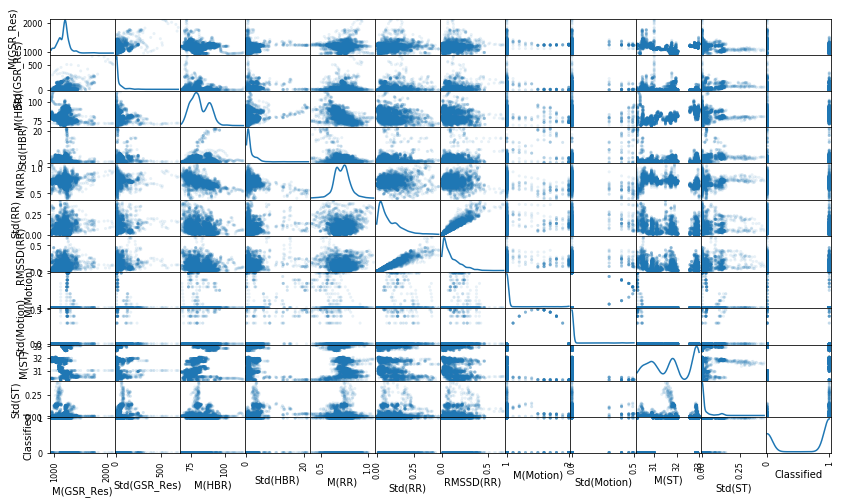

In [15]:
from sklearn.preprocessing import StandardScaler
# the Column Classified was deleted, since its not used for PCA
#del feature_matrix['Classified']
standardized_data = StandardScaler().fit_transform(feature_matrix)
good_data = pd.DataFrame(standardized_data, index=feature_matrix.index, columns=feature_matrix.columns)
pd.plotting.scatter_matrix(feature_matrix, alpha = 0.1, figsize = (14,8), diagonal = 'kde');

Correlations by definition mean: When one value changes, the other changes as well. Therefore a high correlation means that the two variables plotted against each other show a nice line, nearly at 45° angle towards the coordinate system.

Only the standard deviation and rmssd of the rr-rate show a strong correlation. Maybe Scatter-Plot will get better after Z-Normalization (because regression learner had such a good result). Or we did something wrong ;) 

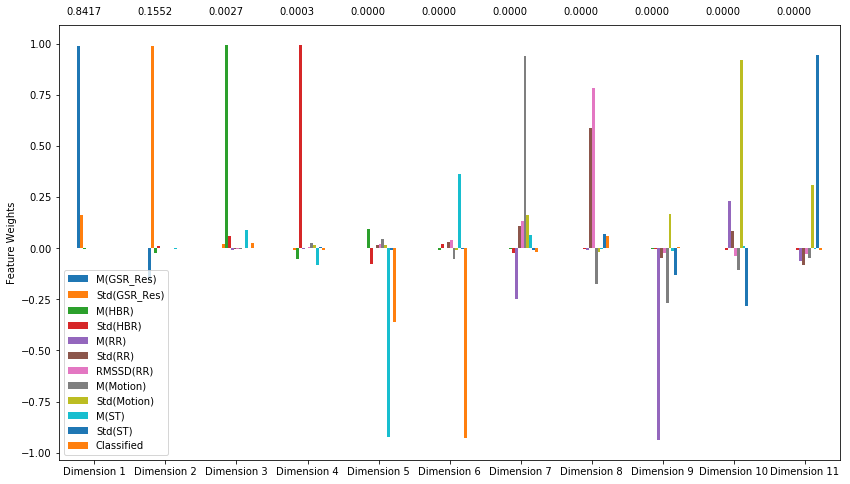

In [18]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 11)
pca = pca.fit(feature_matrix)

# Generate PCA results plot
pca_results = vs.pca_results(feature_matrix, pca);


when doing a PCA on the not-standardized Data, the whole dataset is described in one Dimension (the one of the GSR_Resistance feature). Obviously thats not right. Its just because the values of GSR_Resistance are varying in a big range [400 - 2090]. 
Standardization is needed to get the right result:

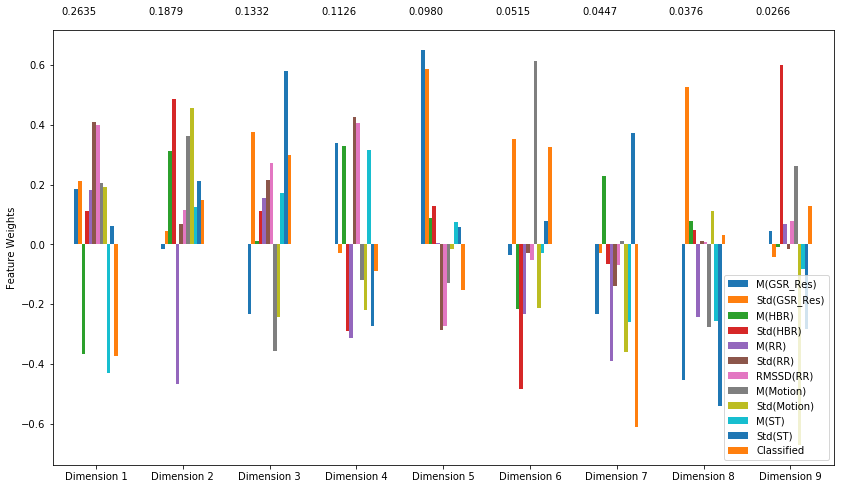

In [22]:
pca = PCA(n_components = 9)
pca = pca.fit(good_data)

pca_results = vs.pca_results(good_data, pca);

After Standardization the result is more realistic. 2 Dimensions make up to 60% of data variance , 3 up to 72% etc..

Dimension 1 says that STD(RR) and RMSSD(RR) are strongly corelated (as we have seen before). Also a big factor for variance is the mean of the Motiontype (which seems to be false when we gather more data). The Graph in Dimension 1 basically says, if you have the STD(RR), RMSSD(RR), STD(HBR), M(Motion) of a Person, the other features are not that relevant anymore. The Dimension 1 contains only 36% of Data Variance, so you have to take a look at the other dimensions, where other features are relevant. -> Seems like we need every feature to predict a playlist

## PCA - Dimensionality Reduction on two Dimensions

A PCA was made to two dimensions and a biplot to visualize the result

,M(GSR_Res),Std(GSR_Res),M(HBR),Std(HBR),M(RR),Std(RR),RMSSD(RR),M(Motion),Std(Motion),M(ST),Std(ST)
0,0.216020,-0.489180,0.810859,-0.683498,-0.275022,-1.175935,-1.114490,-0.182152,-0.148495,0.89204,-0.407748
1,0.216020,-0.489180,0.810859,-0.683498,-0.275022,-1.175935,-1.114490,-0.182152,-0.148495,0.89204,-0.407748
2,0.216020,-0.489180,0.810859,-0.683498,-0.275022,-1.175935,-1.114490,-0.182152,-0.148495,0.89204,-0.407748
3,0.215169,-0.483610,0.810859,-0.683498,-0.275022,-1.175935,-1.114490,-0.182152,-0.148495,0.89204,-0.407748
4,0.214319,-0.481753,0.840005,-0.418206,-0.356311,-0.894889,-0.873863,-0.182152,-0.148495,0.89204,-0.407748


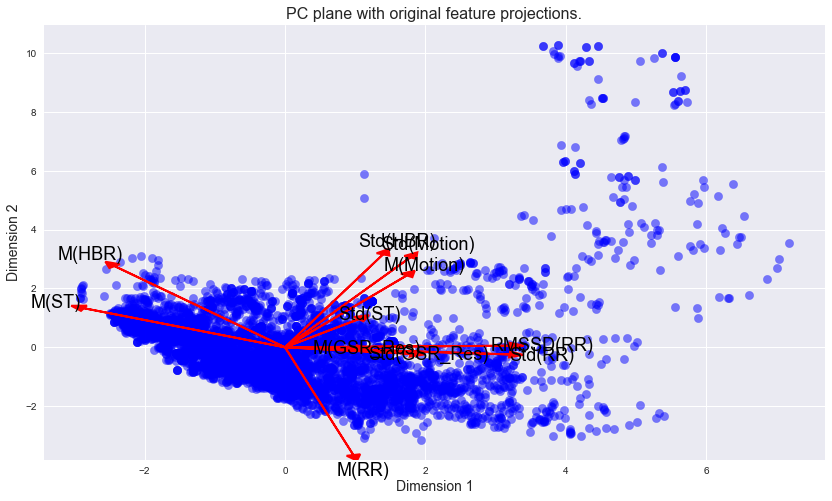

In [105]:
label = feature_matrix['Classified']
label_playlist = label.to_frame
only_data = pd.DataFrame(good_data, index=feature_matrix.index, columns=feature_matrix.columns)
del only_data['Classified']


display(only_data.head())

pca = PCA(n_components=3)
pca = pca.fit(only_data)
# Transform the data using the PCA fit above
reduced_data = pca.transform(only_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

# Create a biplot
vs.biplot(only_data, reduced_data, pca);

In [121]:
print(label)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
6260    0
6261    0
6262    0
6263    0
6264    0
6265    0
6266    0
6267    0
6268    0
6269    0
6270    0
6271    0
6272    0
6273    0
6274    0
6275    0
6276    0
6277    0
6278    0
6279    0
6280    0
6281    0
6282    0
6283    0
6284    0
6285    0
6286    0
6287    0
6288    0
6289    0
Name: Classified, Length: 6290, dtype: int64


In [123]:
from sklearn import tree
import graphviz 


clf = tree.DecisionTreeClassifier(min_samples_split=100)
clf = clf.fit(only_data, label)


labels2 = label.astype(str)


dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = features,
                         filled=True) 
graph = graphviz.Source(dot_data) 
graph.render("playlist")
 



'playlist.pdf'

In [87]:
import seaborn as sns
import matplotlib as pyplot
from mpl_toolkits.mplot3d import Axes3D



fig = pyplot.figure.Figure()
fig.__init__()
ax =fig.add_subplot(111, projection='3d')

#df = pd.DataFrame(dict(Dim1 = reduced_data['Dimension 1'], Dim2 = reduced_data['Dimension 2'], Dim3 = reduced_data['Dimension 3'], playlist=label))
#sns.lmplot('Dim1', 'Dim2', 'Dim3', data=df2, hue='playlist', fit_reg=False, size= 15)

#print(reduced_data['Dimension 1'])
#print(reduced_data['Dimension 2'])
#print(reduced_data['Dimension 3'])
#print(label)

ax.scatter(list(reduced_data['Dimension 1']), list(reduced_data['Dimension 2']), list(reduced_data['Dimension 3']))

ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')

pyplot.pyplot.show()
#pyplot.savefig("plot.png")







/Users/Shared/anaconda/anaconda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1025: UserWarning: Axes3D.figure.canvas is 'None', mouse rotation disabled.  Set canvas then call Axes3D.mouse_init().
  warnings.warn('Axes3D.figure.canvas is \'None\', mouse rotation disabled.  Set canvas then call Axes3D.mouse_init().')


The original feature projections (in red) make it easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower middle is a Person which can be well described by the mean of the GSR_Resistance and the Mean of the RR_rate but not so good with the Mean of the Skin_Temperature. There is a wide spread of data points so it seems (like we said before) that all features are needed to describe every person and make a decision for a playlist

## Clustering the reduced Data

Different Clustering Algorithms are used to find the two playlists (in file scatter_plot_2Dim.html) in the data. 

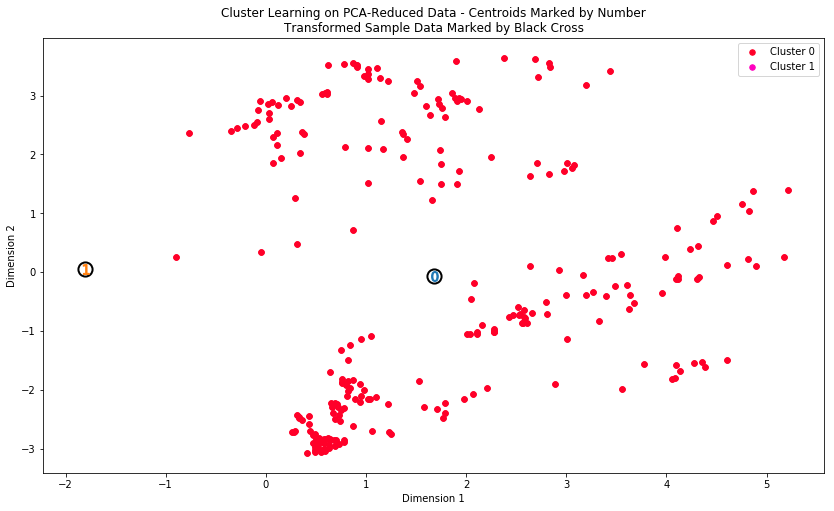

In [41]:
import importlib

from sklearn.mixture import GaussianMixture
importlib.reload(vs)

clusterer = GaussianMixture(n_components=2)
clusterer = clusterer.fit(reduced_data)
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

centers = clusterer.means_

vs.cluster_results(reduced_data, preds, centers)

Gaussian Clustering did not work well - Maybe because the data is not normal distributed

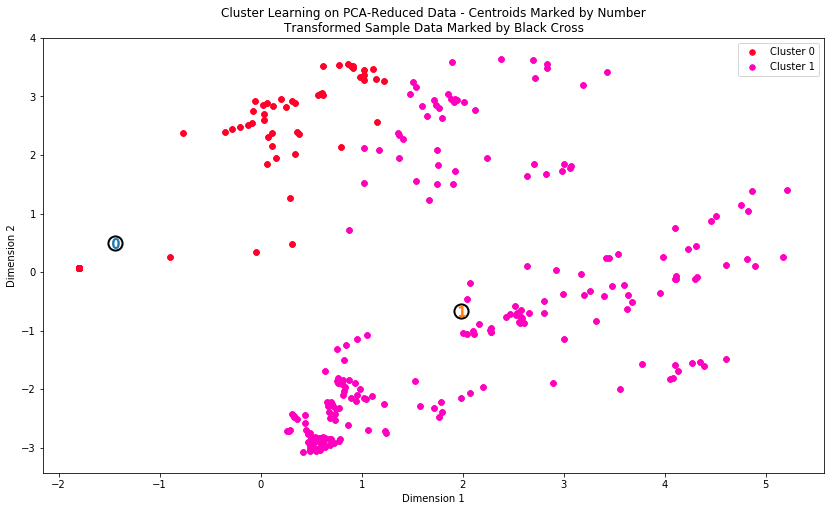

In [44]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(reduced_data)
pred2 = kmeans.predict(reduced_data)

centroids = kmeans.cluster_centers_

vs.cluster_results(reduced_data, pred2, centroids)

k-Means Clustering worked better - still there are many misclassified points. scatter_plot_2Dim.html shows the two dim- representation with the knowledge about which playlist should be chosen. It can be compared to this picture to have a clue about it.  

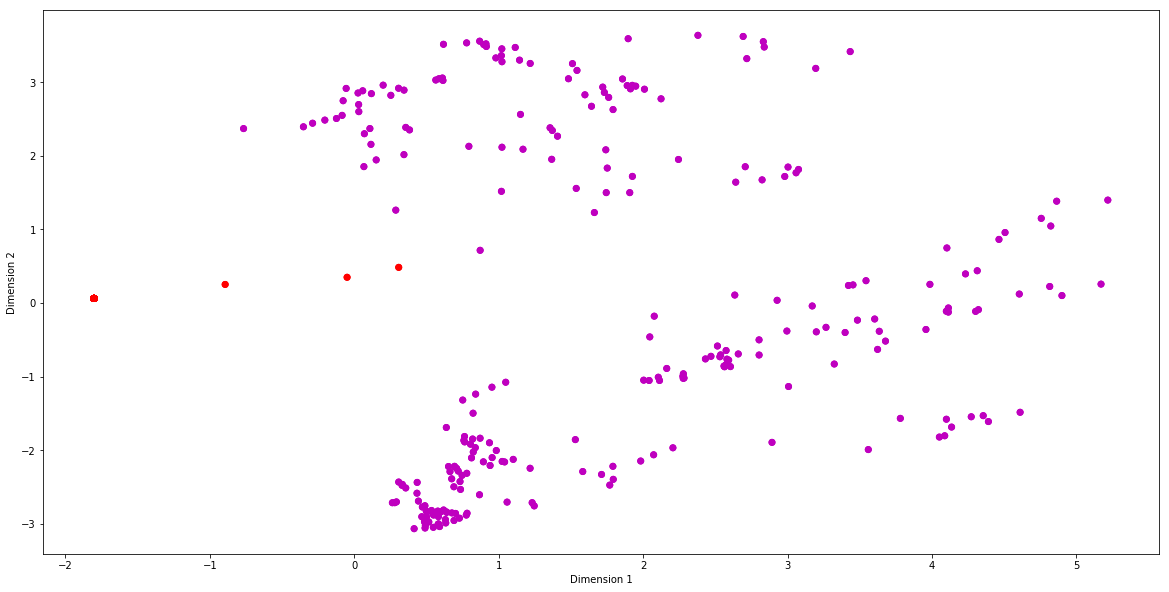

In [90]:
import matplotlib.pyplot as plt

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels


db = cluster.DBSCAN()
db = dbscan.fit(reduced_data)
labels = db.labels_

colors = set_colors(labels)
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=colors) 
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.rcParams["figure.figsize"] = (20,10)
plt.show();


DBSCAN Clustering is also not working correctly (different epsilon and min_points were tested) 

Maybe do a PCA on raw data, delete the outliers and make a SVM, Decision Tree Classificator will work best. As we have seen the two playlists on the dataset were really good separable (scatter_plot_2Dim.html)